In [141]:
def gradientDescent(m, theta, x_train, x_test, y_train, y_test, iterations, learning_rate):

    train_losses = []
    val_losses = []
    print("gradient descent called")
    for iteration in range(iterations):
        gradients = 2/m * x_train.T.dot(x_train.dot(theta) - y_train)
        theta -= learning_rate * gradients

        train_loss = (1/m) * np.sum(np.square(x_train.dot(theta) - y_train))
        val_loss = (1/len(y_test)) * np.sum(np.square(x_test.dot(theta) - y_test))

        train_losses.append(train_loss)
        val_losses.append(val_loss)


    return train_losses, val_losses

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/ML/Data_sets/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))


print(housing.shape)



housing.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [143]:

def binary_map(x):
    return x.map({'yes': 1, 'no': 0})


varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [144]:
#getting just the variables for question 2a



varlist_2a = ["price", "area", "bedrooms", "bathrooms", "stories", "parking"]
housing_2a = housing[varlist_2a]


housing_2a.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [145]:
from sklearn.model_selection import train_test_split


np.random.seed(0)
df_train, df_test = train_test_split(housing_2a, train_size = 0.8, test_size = 0.2, random_state = 100)

#separating the data into x vals and y vals
x_vars = ["area", "bedrooms", "bathrooms", "stories", "parking"]


y_vars_train = df_train["price"]
y_vars_test = df_test["price"]


In [146]:
#normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


df_train_1 = df_train
df_test_1 = df_test

#normalizing only the x vals
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

df_train_1[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test_1[num_vars] = scaler.fit_transform(df_test[num_vars])




x_vars_train = df_train_1[x_vars]
x_vars_test = df_test_1[x_vars]


x_vars_train.head()
y_vars_train.head()




22     8645000
41     7840000
91     6419000
118    5950000
472    3010000
Name: price, dtype: int64

gradient descent called


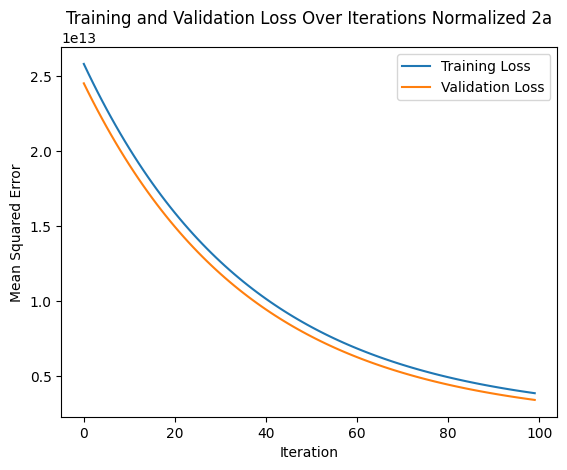

In [147]:
learning_rate = 0.01
n_iterations = 100
m = len(df_train)

theta = np.zeros(len(x_vars)+1)

x_train_b = np.c_[np.ones((len(x_vars_train), 1)), x_vars_train]
x_test_b = np.c_[np.ones((len(x_vars_test), 1)), x_vars_test]




train_losses, val_losses = gradientDescent(m, theta, x_train_b, x_test_b, y_vars_train, y_vars_test, n_iterations, learning_rate)

plt.figure()
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations Normalized 2a")
plt.show()




In [148]:
#standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


df_train_2 = df_train
df_test_2 = df_test


df_train_2[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test_2[num_vars] = scaler.fit_transform(df_test[num_vars])


x_vars_train = df_train_2[x_vars]
x_vars_test = df_test_2[x_vars]




gradient descent called


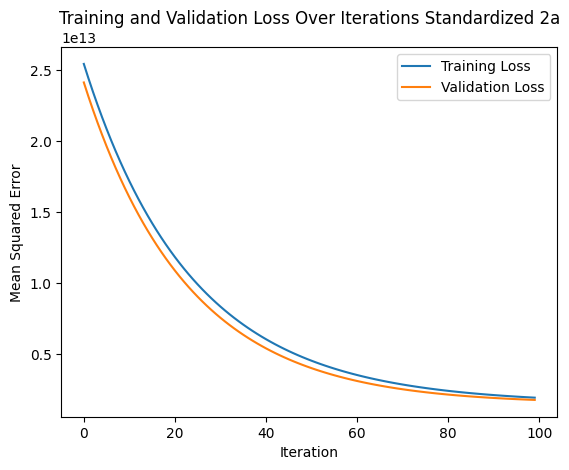

In [149]:
learning_rate = 0.01
n_iterations = 100
m = len(df_train)

theta = np.zeros(len(x_vars)+1)




x_train_b = np.c_[np.ones((len(x_vars_train), 1)), x_vars_train]
x_test_b = np.c_[np.ones((len(x_vars_test), 1)), x_vars_test]




train_losses, val_losses = gradientDescent(m, theta, x_train_b, x_test_b, y_vars_train, y_vars_test, n_iterations, learning_rate)

plt.figure()
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations Standardized 2a")
plt.show()




gradient descent called


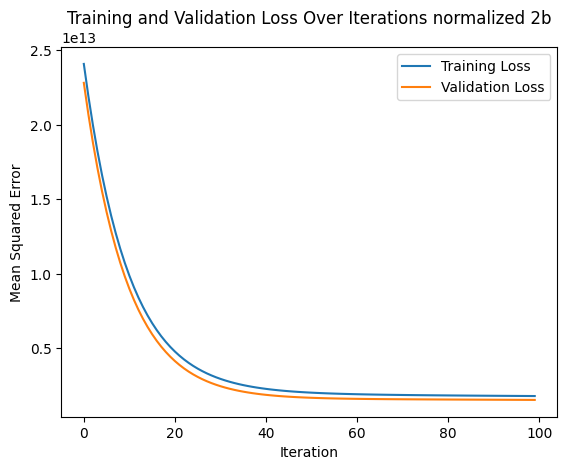

In [150]:
#2b
#getting the new x values


varlist_2b = ["price","area", "bedrooms", "bathrooms", "stories", "parking", "mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]
housing_2b = housing[varlist_2b]



df_train2, df_test2 = train_test_split(housing_2b, train_size = 0.8, test_size = 0.2, random_state = 100)


x_vars = ["area", "bedrooms", "bathrooms", "stories", "parking", "mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]

#taking y vals from df2
y_vars_train = df_train2["price"]
y_vars_test = df_test2["price"]


#creating local data frames for normalization
df_train2_1, df_test2_1 = df_train2, df_test2

#normalization
scaler = MinMaxScaler()

#normalizing df2
df_train2_1[num_vars] = scaler.fit_transform(df_train2[num_vars])
df_test2_1[num_vars] = scaler.fit_transform(df_test2[num_vars])

#taking x values from normalized df2
x_vars_train = df_train2[x_vars]
x_vars_test = df_test2[x_vars]



#notice how the y vals are not taken from the normalized data









learning_rate2 = 0.01
n_iterations2 = 100
m2 = len(df_train2)

theta2 = np.zeros(len(x_vars)+1)




x_train_b = np.c_[np.ones((len(x_vars_train), 1)), x_vars_train]
x_test_b = np.c_[np.ones((len(x_vars_test), 1)), x_vars_test]




train_losses, val_losses = gradientDescent(m2, theta2, x_train_b, x_test_b, y_vars_train, y_vars_test, n_iterations2, learning_rate2)

plt.figure()
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations normalized 2b")
plt.show()


gradient descent called


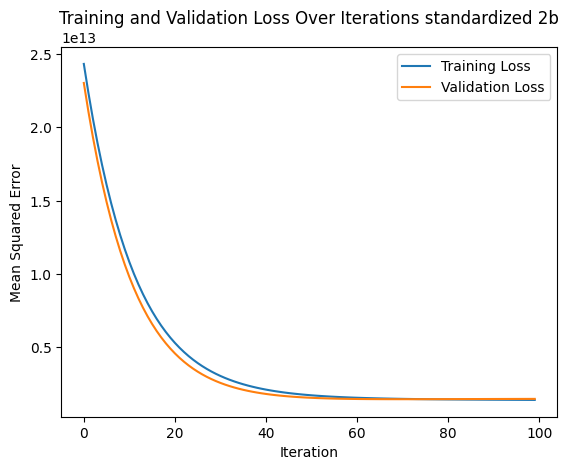

In [151]:
#standardization


scaler = StandardScaler()


df_train2_2, df_test2_2 = df_train2, df_test2

#standardizing df2
df_train2_2[num_vars] = scaler.fit_transform(df_train2[num_vars])
df_test2_2[num_vars] = scaler.fit_transform(df_test2[num_vars])


#taking x values from the strandardized df2
x_vars_train = df_train2[x_vars]
x_vars_test = df_test2[x_vars]







learning_rate2 = 0.01
n_iterations2 = 100
m2 = len(df_train)

theta2 = np.zeros(len(x_vars)+1)




x_train_b = np.c_[np.ones((len(x_vars_train), 1)), x_vars_train]
x_test_b = np.c_[np.ones((len(x_vars_test), 1)), x_vars_test]




train_losses, val_losses = gradientDescent(m2, theta2, x_train_b, x_test_b, y_vars_train, y_vars_test, n_iterations2, learning_rate2)

plt.figure()
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations standardized 2b")
plt.show()
